# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-S109A Introduction to Data Science 

## Homework 5: Ensemble Methods and Neural Networks

**Harvard University**<br/>
**Summer 2020**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



In [57]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

In [58]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [59]:
### cs109default ### 
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.2.0 here!

2.2.0


In [60]:
# pip install --upgrade tensorflow

<hr style="height:2pt">

# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between collisions that produce Higgs bosons and collisions that produce only background noise. 

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle collision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces only other particles (background).

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: [Baldi et al., Nature Communications 5, 2014](https://www.nature.com/articles/ncomms5308).

In [61]:
# Load data
data_train = pd.read_csv('data/Higgs_train.csv')
data_test = pd.read_csv('data/Higgs_test.csv')

print(f"{len(data_train)} training observations, {len(data_test)} test observations")
print("\nColumns:")
print(', '.join(data_train.columns))

5000 training observations, 5000 test observations

Columns:
lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb, class


In [62]:
display(data_train.head())
display(data_train.describe())

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.377,-1.5800,-1.7100,0.991,0.114,1.250,0.620,-1.480,2.17,0.754,0.7750,-0.667,2.21,1.280,-1.190,0.505,0.00,1.110,-0.464,0.397,0.00,0.522,1.320,0.982,1.360,0.965,1.310,1.080,1.0
1,0.707,0.0876,-0.4000,0.919,-1.230,1.170,-0.553,0.886,2.17,1.300,0.7620,-1.060,2.21,0.607,0.459,1.020,0.00,0.497,0.956,0.236,0.00,0.440,0.829,0.992,1.160,2.220,1.190,0.938,1.0
2,0.617,0.2660,-1.3500,1.150,1.040,0.955,0.377,-0.148,0.00,1.060,-0.0194,1.110,0.00,1.470,0.205,-1.060,2.55,1.490,-0.398,-0.542,0.00,1.020,1.030,0.986,0.928,1.370,0.982,0.917,1.0
3,0.851,-0.3810,-0.0713,1.470,-0.795,0.692,0.883,0.497,0.00,1.620,0.1240,1.180,1.11,1.290,0.160,-0.916,2.55,0.945,0.796,-1.520,0.00,1.200,1.100,0.987,1.350,1.460,0.995,0.954,1.0
4,0.768,-0.6920,-0.0402,0.615,0.144,0.749,0.397,-0.874,0.00,1.150,0.1270,1.320,2.21,0.730,-0.758,-1.120,0.00,0.848,0.107,0.502,1.55,0.922,0.864,0.983,1.370,0.601,0.919,0.957,0.0


,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.978645,-0.014280,-0.018956,1.005793,0.002528,0.980390,0.025014,-0.007104,0.993678,0.988659,-0.010310,-0.006926,1.006922,0.997004,0.018817,0.003952,1.011994,0.982806,0.005201,0.003349,1.007810,1.038431,1.027201,1.054719,1.023094,0.958464,1.033432,0.960494,0.524600
std,0.547025,1.011927,0.997945,0.591907,1.003337,0.463677,1.002018,1.014559,1.028920,0.476462,1.007983,1.002177,1.045206,0.471681,1.007824,0.999656,1.200416,0.497681,1.007999,1.008904,1.400846,0.619460,0.353984,0.173243,0.427141,0.495720,0.352966,0.306057,0.499444
min,0.275000,-2.410000,-1.740000,0.010000,-1.740000,0.170000,-2.920000,-1.740000,0.000000,0.198000,-2.910000,-1.740000,0.000000,0.265000,-2.720000,-1.740000,0.000000,0.366000,-2.500000,-1.740000,0.000000,0.151000,0.443000,0.339000,0.371000,0.079500,0.413000,0.452000,0.000000
25%,0.587000,-0.764250,-0.877500,0.581000,-0.870000,0.676000,-0.659250,-0.885000,0.000000,0.666000,-0.699000,-0.859500,0.000000,0.664750,-0.679250,-0.858000,0.000000,0.619000,-0.707250,-0.869250,0.000000,0.798750,0.850000,0.986000,0.768000,0.672000,0.826000,0.772750,0.000000
50%,0.846000,-0.009305,-0.016050,0.903500,0.001300,0.891000,0.049500,-0.023500,1.090000,0.891000,-0.004800,-0.030700,1.110000,0.899500,0.045700,0.018800,0.000000,0.877000,0.012900,-0.004700,0.000000,0.898000,0.957000,0.990000,0.922000,0.868000,0.952000,0.877500,1.000000
75%,1.220000,0.725500,0.837000,1.300000,0.866000,1.160000,0.716000,0.894000,2.170000,1.192500,0.692250,0.855500,2.210000,1.232500,0.717000,0.855000,2.550000,1.220000,0.719000,0.859000,3.100000,1.030000,1.090000,1.030000,1.160000,1.120000,1.140000,1.060000,1.000000
max,5.330000,2.430000,1.740000,6.260000,1.740000,4.190000,2.960000,1.740000,2.170000,4.800000,2.910000,1.740000,2.210000,4.630000,2.730000,1.740000,2.550000,5.770000,2.490000,1.740000,3.100000,10.600000,5.740000,3.940000,6.220000,5.080000,4.320000,3.500000,1.000000


In [63]:
# Split into NumPy arrays
X_train = data_train.iloc[:, data_train.columns != 'class'].values
y_train = data_train['class'].values
X_test = data_test.iloc[:, data_test.columns != 'class'].values
y_test = data_test['class'].values

---

<div class='exercise'><b>Question 1 [20pts]: Base Modeling </b></div>
We begin by looking at parametric approaches to modeling the Boson data.

**1.1** Calculate the correlation matrix (using `df.corr()` from pandas) between all predictors in the training data set and represent this as a heatmap using (`seaborn.heatmap`).  What does the suggest about the presence of muilticollinearity in the predictor set?

**1.2** Fit a logistic regression model to predict `class` from all 28 of the predictors, and evaluate the model's accuracy on both the training and test sets.

**1.3** Fit a logistic regression model to predict `class` from all 28 of the predictors and all two-way interactions between these predictors (you should have $28+{28 \choose 2} = 406$ columns in the design matrix, ignoring the intercept).  Evaluate the model's accuracy on both the training and test sets.

Hint: you may have to scale your predictors (purely for numerical reasons) and use`maxiter=2000` to avoid the warnings (the next part as well).

**1.4** Use 'L2' regularization on the model in the previous part, tuning the penalty term using 5-fold cross-validation (consider the set of Cs to be [0.01,0.1,1,10,100,1000]).  Which penalty term performed best?  Evaluate the best model's accuracy on both the training and test sets and assign them to variables named `logistic_train_score` and `logistic_test_score`.

**1.5** Compare the performance of the 3 models above.  Which model performs the best on the train set?  Which the best on the test set?  Is this expected?

## Answers:

**1.1** Calculate the correlation matrix (using `df.corr()` from pandas) between all predictors in the training data set and represent this as a heatmap using (`seaborn.heatmap`).  What does the suggest about the presence of muilticollinearity in the predictor set?

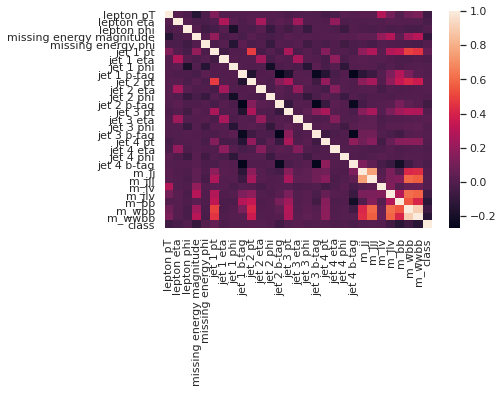

In [64]:
######
# your code here
cor_mat = data_train.corr()

# plot the heatmap
sns.heatmap(cor_mat, 
        xticklabels=cor_mat.columns,
        yticklabels=cor_mat.columns)
######

*From our plot, the predictors in our training data do not show high multi-colinearity, as depicted by the low correlation values of about 0-0.2 between predictors on average. Some predictors, however, such as m_wbb and m_wwbb have significant correlations approximated to as high as 0.6. *

**1.2** Fit a logistic regression model to predict `class` from all 28 of the predictors, and evaluate the model's accuracy on both the training and test sets.

In [65]:
######
# your code here
logit1_2 = LogisticRegression(C=100000, fit_intercept=True).fit(X_train, y_train)
yhat_train1_2 = logit1_2.predict(X_train)
yhat_test1_2 = logit1_2.predict(X_test)


print("The classification accuracy of the model on the training set is " +
      str(accuracy_score(y_train, yhat_train1_2)) + ", and " +
      'the classification accuracy of the model on the test set is ' +
      str(accuracy_score(y_test, yhat_test1_2)) + ".")
######

The classification accuracy of the model on the training set is 0.6308, and the classification accuracy of the model on the test set is 0.6412.


**1.3** Fit a logistic regression model to predict `class` from all 28 of the predictors and all two-way interactions between these predictors (you should have $28+{28 \choose 2} = 406$ columns in the design matrix, ignoring the intercept).  Evaluate the model's accuracy on both the training and test sets.

Hint: you may have to scale your predictors (purely for numerical reasons) and use`maxiter=2000` to avoid the warnings (the next part as well).

In [66]:
######
# your code here
interaction_train1_3 = PolynomialFeatures(2, include_bias=False, interaction_only=True).fit_transform(X_train)
interaction_test1_3 = PolynomialFeatures(2, include_bias=False, interaction_only=True).fit_transform(X_test) 

logit1_3 = LogisticRegression(C=100000, fit_intercept=True, max_iter=20000).fit(interaction_train1_3, y_train)
yhat_train1_3 = logit1_3.predict(interaction_train1_3)
yhat_test1_3 = logit1_3.predict(interaction_test1_3)

print("The classification accuracy of the model on the training set is " +
      str(accuracy_score(y_train, yhat_train1_3)) + ", and " +
      'the classification accuracy of the model on the test set is ' +
      str(accuracy_score(y_test, yhat_test1_3)) + ".")
######

The classification accuracy of the model on the training set is 0.698, and the classification accuracy of the model on the test set is 0.6408.


**1.4** Use 'L2' regularization on the model in the previous part, tuning the penalty term using 5-fold cross-validation (consider the set of Cs to be [0.01,0.1,1,10,100,1000]).  Which penalty term performed best?  Evaluate the best model's accuracy on both the training and test sets. 



In [67]:
######
# your code here
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import Ridge

Cs = [0.01,0.1,1,10,100,1000]
ridges = RidgeClassifierCV(alphas=Cs,fit_intercept=True,cv=5).fit(X_train, y_train)
best_ridge = ridges.fit(X_train, y_train)
yhat_train1_4 = best_ridge.predict(X_train)
yhat_test1_4 = best_ridge.predict(X_test)

print("Best alpha value for ridge model: ",ridges.alpha_)
print("The classification accuracy of the model on the training set is " +
      str(accuracy_score(y_train, yhat_train1_4)) + ", and " +
      'the classification accuracy of the model on the test set is ' +
      str(accuracy_score(y_test, yhat_test1_4)) + ".")
######

Best alpha value for ridge model:  0.1
The classification accuracy of the model on the training set is 0.631, and the classification accuracy of the model on the test set is 0.6406.


**1.5** Compare the performance of the 3 models above.  Which model performs the best on the train set?  Which the best on the test set?  Is this expected?

*Of the 3 models above, the logistic regression model in 1.3 with interaction terms yields the highest training accuracy of 0.698. However, it's testing accuracy is a few decimal points less of the logistic regression in 1.2 without interaction terms. Generally, the low accuracy on training and test set in each of our models is reflective of the weak predictive value of our features and their simple interactions. This is expected as from 1.1 it's clear that some of our predictors have high multicollinearity, with correlation values as high as 0.6, which reduce the precision of our coefficients for our logistic regression models. *

---

<div class='exercise'><b>Question 2 [25pts]: Tree and Forest Models </b></div>
Our first go to tree-based models, along with our first ensemble methods (bagging and random forests) which we played around with a bit on homework 4.

**2.1** Fit a decision tree model to the training set. Choose a range of tree depths from 1 to 20 and evaluate the  performance and standard deviations for each depth using 5-fold cross-validation. Plot the estimated mean +/- 2 standard deviations for each depth. Also, include the training set performance in your plot, but set the y-axis to focus on the cross-validation performance. 
Store the CV means and std variables `cvmeans`, `cvstds` and the train score `train_scores`  

*Hint*: use `plt.fill_between` to shade the region.

**2.2** Select an appropriate depth and justify your choice using your cross-validation estimates. Then report the classification accuracy on the **test set**. Store the training and test accuracies in variables named `best_cv_tree_train_score` and `best_cv_tree_test_score` to refer to in a later question.

**2.3** Fit a Bagging model using the `X_train` data.  Tune (1) the tree depth from the depths of [5.10.15], and (2) the number of trees from the options [20,50,100].  Evaluate its accuracy on the train and test sets and assign it to variables named `bagging_train_score` and `bagging_test_score`.

**2.4** Fit a `RandomForestClassifier` using the original `X_train` data using the same tree depth and number of trees that you used in the previous question, but tune the number features to consider when looking for the best splits (consider from the list [5,10,15,20,25]). Evaluate its accuracy on the train and test sets and assign it to variables named `random_forest_train_score` and `random_forest_test_score`.

**2.5** Why should the bagging model be tuned to a `max_depth` that is at least as deep as the best single tree depth (from 2.2)?

**2.6**: If you were to run your code again for the bagging and random forest models, would you get the same results?  Why?


## Answers

**2.1** Fit a decision tree model to the training set. Choose a range of tree depths from 1 to 20 and evaluate the  performance and standard deviations for each depth using 5-fold cross-validation. Plot the estimated mean +/- 2 standard deviations for each depth. Also, include the training set performance in your plot, but set the y-axis to focus on the cross-validation performance. 
Store the CV means and std variables `cvmeans`, `cvstds` and the train score `train_scores`  

*Hint*: use `plt.fill_between` to shade the region.


In [102]:
######
# your code here
depths = list(range(1, 21))
train_scores = []
cvmeans = []
cvstds = []
cv_scores = []
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    # Perform 5-fold cross validation and store results
    train_scores.append(dtree.fit(X_train, y_train).score(X_train, y_train))
    scores = cross_val_score(estimator=dtree, X=X_train, y=y_train, cv=5)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())

cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)
######


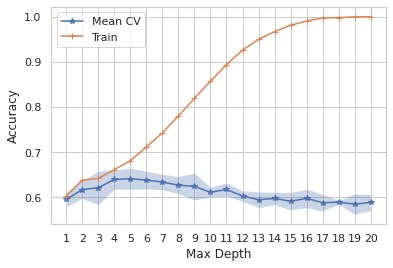

In [69]:
plt.plot(depths, cvmeans, '*-', label="Mean CV")
plt.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.3)
ylim = plt.ylim()
plt.plot(depths, train_scores, '-+', label="Train")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.xticks(depths);

**2.2** Select an appropriate depth and justify your choice using your cross-validation estimates. Then report the classification accuracy on the **test set**. Store the training and test accuracies in variables named `best_cv_tree_train_score` and `best_cv_tree_test_score` to refer to in a later question.

In [70]:
######
# your code here
depth = [3, 4, 5, 6]
pc_df = pd.DataFrame(columns = ['Depth', "Train Accuracy", 'Test Accuracy'])
for d in depth:
  simpletree = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)  
  train_accuracy = cross_val_score(estimator=simpletree, X=X_train, y=y_train, cv=5)
  test_accuracy  = cross_val_score(estimator=simpletree, X=X_test, y=y_test, cv=5)
  pc_df = pc_df.append({"Depth": int(d), "Train Accuracy": train_accuracy.mean(), "Test Accuracy": test_accuracy.mean()}, ignore_index=True)

pc_df

######


,Depth,Train Accuracy,Test Accuracy
0,3.0,0.6212,0.6378
1,4.0,0.6392,0.6648
2,5.0,0.6418,0.6522
3,6.0,0.6390,0.6436


In [71]:
depth = 5
simpletree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
yhat_train2_2 = simpletree.predict(X_train)
yhat_test2_2 = simpletree.predict(X_test)
best_cv_tree_train_score = accuracy_score(y_train, yhat_train2_2)
best_cv_tree_test_score = accuracy_score(y_test, yhat_test2_2)

print('The accuracy of the model on the training set with depth 5 is' + str(best_cv_tree_train_score) + ' and on test set is ' +
      str(best_cv_tree_test_score) + '.')

The classification accuracy of the model on the training set is0.6812 and on test set is 0.6478.


In [ ]:
best_cv_tree_train_score = cross_val_score(estimator=simpletree, X=X_train, y=y_train, cv=5)

*Using cross-validation we compare the classification accuracy for each depth and choose depth 5 to be optimal as it gives the highest accuracy on testing data.*



**2.3** Fit a Bagging model using the `X_train` data.  Tune (1) the tree depth from the depths of [5.10.15], and (2) the number of trees from the options [20,50,100].  Evaluate its accuracy on the train and test sets and assign it to variables named `bagging_train_score` and `bagging_test_score`.

In [72]:
######
# your code here
from sklearn.utils import resample
df_23 = pd.DataFrame(columns = ['Trees', 'Depth', "Train Accuracy", 'Test Accuracy'])

ntrees = [20,50,100]
depths = [5,10,15]
scores = [0]*3
estimators = []
trees = []
bagging_train_scores = []
bagging_test_scores = []

for tree in ntrees:
        for depth in depths:
            simpletree = DecisionTreeClassifier(max_depth=depth)
            trees.append(simpletree)
            boot_x, boot_y = resample(X_train, y_train)
            estimators = np.append(estimators,simpletree.fit(boot_x, boot_y))
            bagging_train_score = accuracy_score(y_train, simpletree.predict(X_train))
            bagging_test_score = accuracy_score(y_test, simpletree.predict(X_test))
            bagging_train_scores.append(bagging_train_score)
            bagging_test_scores.append(bagging_test_score)
            df_23 = df_23.append({"Trees": int(tree), "Depth": int(depth), "Train Accuracy": bagging_train_score, "Test Accuracy": bagging_test_score}, ignore_index=True)

df_23


######

,Trees,Depth,Train Accuracy,Test Accuracy
0,20.0,5.0,0.6650,0.6382
1,20.0,10.0,0.7700,0.6298
2,20.0,15.0,0.8378,0.6044
3,50.0,5.0,0.6666,0.6258
4,50.0,10.0,0.7720,0.6212
5,50.0,15.0,0.8328,0.5890
6,100.0,5.0,0.6594,0.6254
7,100.0,10.0,0.7792,0.6228
8,100.0,15.0,0.8364,0.6006


In [73]:
ntrees = pd.DataFrame([20,20,20,50,50,50,100,100,100], columns = ['ntree'])
depths = pd.DataFrame([5,10,15,5,10,15,5,10,15],  columns = ['depth'])
train_scores = pd.DataFrame(bagging_train_scores,  columns = ['train_scores'])
test_scores = pd.DataFrame(bagging_test_scores,  columns = ['test_scores'])
bagging_scores = pd.concat([train_scores, test_scores, ntrees, depths], 
                                axis = 1)

In [74]:
## get info of highest test accuracy depth/tree size
bagging_scores.iloc[bagging_scores['test_scores'].idxmax()]

train_scores     0.6650
test_scores      0.6382
ntree           20.0000
depth            5.0000
Name: 0, dtype: float64

In [75]:
bagging_train_score = bagging_scores.iloc[bagging_scores['test_scores'].idxmax()]['train_scores']
bagging_test_score = bagging_scores.iloc[bagging_scores['test_scores'].idxmax()]['test_scores']

**2.4** Fit a `RandomForestClassifier` using the original `X_train` data using the same tree depth and number of trees that you used in the previous question, but tune the number features to consider when looking for the best splits (consider from the list [5,10,15,20,25]). Evaluate its accuracy on the train and test sets and assign it to variables named `random_forest_train_score` and `random_forest_test_score`.




In [76]:
######
# your code here
np.random.seed(40)
random_forest_train_scores = []
random_forest_test_scores = []
nfeatures = [5,10,15,20,25]
for nf in nfeatures:
    rf2_4 = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=nf).fit(X_train, y_train)
    random_forest_train_score = accuracy_score(y_train,rf2_4.predict(X_train))
    random_forest_test_score = accuracy_score(y_test,rf2_4.predict(X_test))
    random_forest_train_scores.append(random_forest_train_score)
    random_forest_test_scores.append(random_forest_test_score)
    print('For', nf, 'maximum features', 
          ', accuracy on the training set and test set are respectively:', 
           random_forest_train_score, 'and', random_forest_test_score)
######


For 5 maximum features , accuracy on the training set and test set are respectively: 0.7338 and 0.6886
For 10 maximum features , accuracy on the training set and test set are respectively: 0.7308 and 0.6886
For 15 maximum features , accuracy on the training set and test set are respectively: 0.7292 and 0.6888
For 20 maximum features , accuracy on the training set and test set are respectively: 0.7266 and 0.6898
For 25 maximum features , accuracy on the training set and test set are respectively: 0.7206 and 0.6794


In [77]:
nfeatures = pd.DataFrame(nfeatures,  columns = ['number_features'])
train_scores = pd.DataFrame(random_forest_train_scores,  columns = ['random_forest_train_scores'])
test_scores = pd.DataFrame(random_forest_test_scores,  columns = ['random_forest_test_scores'])
rf_scores = pd.concat([train_scores, test_scores, nfeatures], 
                                axis = 1)

In [78]:
## get info of highest test accuracy maximum features
rf_scores.iloc[rf_scores['random_forest_test_scores'].idxmax()]

random_forest_train_scores     0.7266
random_forest_test_scores      0.6898
number_features               20.0000
Name: 3, dtype: float64

In [79]:
random_forest_train_score = rf_scores.iloc[rf_scores['random_forest_test_scores'].idxmax()]['random_forest_train_scores']
random_forest_test_score = rf_scores.iloc[rf_scores['random_forest_test_scores'].idxmax()]['random_forest_test_scores']

**2.5** Why should the bagging model be tuned to a `max_depth` that is at least as deep as the best single tree depth (from 2.2)?



*Having max_depth at least as deep as the best single tree allows us to optimize our bias-variance tradeoff by ensuring that our bagging model begins with as much bias as the best single tree. The best decision tree by definition does not make assumptions on the target function i.e it has low bias. In turn, the bagging method helps reduce the variance in our single decision tree by introducing some bias in our model, thus acheiving the optimal bias-variance tradeoff for our model.*

**2.6**: If you were to run your code again for the bagging and random forest models, would you get the same results?  Why?


*We would see slight differences in the model accuracy in both methods. In bagging, we are essentially training each tree in an ensemble from a different random sample of our data. As we choose a random fixed amount of the samples to train each base estimator, we introduce some randomness in our model. In random forests, we use boostrap sampling to build our model. While each decision tree is training on the exact same data, we get a different cumulative model each run because of the different boostrap samples used to train the model each time*

---

<div class='exercise'><b> Question 3 [25 pts]: Boosting </div>
In this question we explore a different kind of ensemble method, boosting, where each new model is trained on a dataset weighted towards observations that the current set of models predicts incorrectly. 

We'll focus on the AdaBoost flavor of boosting and examine what happens to the ensemble model's accuracy as the algorithm adds more estimators (iterations) to the ensemble.

**3.1** We'll motivate AdaBoost by noticing patterns in the errors that a single classifier makes. Fit `tree1`, a decision tree with depth 3, to the training data. 
Report the train and test accuracies. For each predictor, make a plot that compares two distributions: the values of that predictor for examples that `tree1` classifies correctly, and the values of that predictor for examples that `tree1` classifies incorrectly. Do you notice any predictors for which the distributions are clearly different?

*Hints*:
- If you have `fig, axs = plt.subplots(...)`, then `axs.ravel()` gives a list of each plot in reading order.
- [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) takes `ax` and `label` parameters.

**3.2** Use the sklearn implementation of AdaBoost: Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 800 iterations. Make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.

*Hint*: The `staged_score` method provides the accuracy numbers you'll need. You'll need to use `list()` to convert the "generator" it returns into an ordinary list.

**3.3** Repeat the plot above for a base learner with depth of (1, 2, 3, 4). What trends do you see in the training and test accuracy?

(It's okay if your code re-fits the depth-3 classifier instead of reusing the results from the previous problem.)

**3.4** Based on the plot you just made, what combination of base learner depth and number of iterations seems optimal? Why? How does the performance of this model compare with the performance of the ensembles you considered above?

**3.5** What is the impact of having too many trees in boosting and in bagging? In which instance is it worse to have too many trees?

**3.6** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

## Answers

**3.1** We'll motivate AdaBoost by noticing patterns in the errors that a single classifier makes. Fit `tree1`, a decision tree with depth 3, to the training data. 
Report the train and test accuracies. For each predictor, make a plot that compares two distributions: the values of that predictor for examples that `tree1` classifies correctly, and the values of that predictor for examples that `tree1` classifies incorrectly. Do you notice any predictors for which the distributions are clearly different?

*Hints*:
- If you have `fig, axs = plt.subplots(...)`, then `axs.ravel()` gives a list of each plot in reading order.
- [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) takes `ax` and `label` parameters.

In [80]:
######
# your code here
tree1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3).fit(X_train, y_train))
train_score = dtree.score(X_train, y_train)
test_score = dtree.score(X_test, y_test)
scores = cross_val_score(estimator=dtree, X=X_train, y=y_train, cv=5)
######


In [81]:
yhat_test3_1 = tree1.fit(X_train, y_train).predict(X_test)
yhat_test3_1
yhat_train3_1 = tree1.fit(X_train, y_train).predict(X_train)
yhat_train3_1

correct_train = [0]*len(X_train)
for i in range(len(X_train)):
    if yhat_train3_1[i] == y_train[i]:
        correct_train[i] = 1
correct_test = [0]*len(X_test)
for i in range(len(X_test)):
    if yhat_test3_1[i] == y_test[i]:
        correct_test[i] = 1
        
correct_train = pd.DataFrame(correct_train, columns = ['correct_pred'])
correct_test = pd.DataFrame(correct_test, columns = ['correct_pred'])

train_acc = pd.concat([data_train, correct_train], axis = 1)
test_acc = pd.concat([data_test, correct_test], axis = 1)

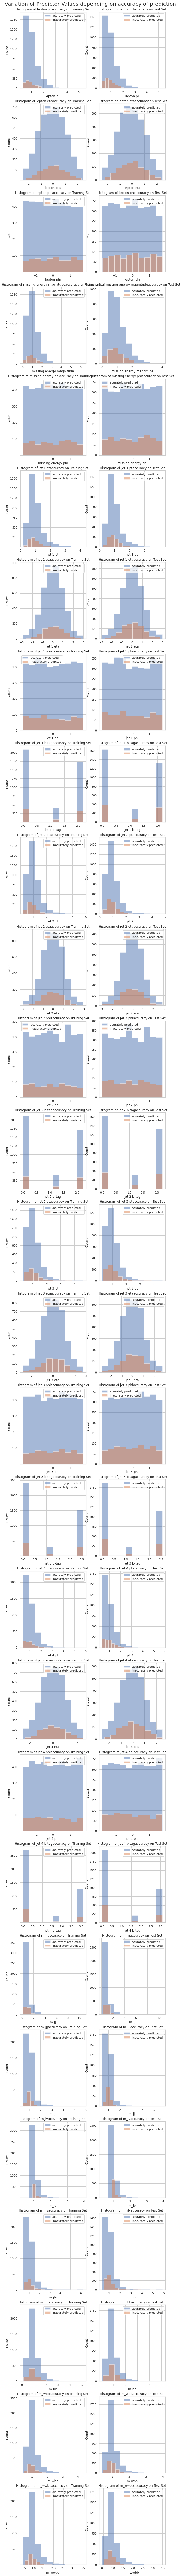

In [82]:
i = 0
fig, ax = plt.subplots(len(data_train.columns[:-1]),2,figsize = (10,180))

predictors  = data_train.columns[:-1]

for predictor in predictors:
    ax[i, 0].hist(train_acc[train_acc['correct_pred'] == 1][predictor], alpha = .5, label='acurately predicted')
    ax[i, 0].hist(train_acc[train_acc['correct_pred'] == 0][predictor], alpha = .5, label='inacurately predicted')
    ax[i, 0].set_title('Histogram of ' + str(predictor) + 'accuracy on Training Set')
    ax[i, 0].set_ylabel('Count')
    ax[i, 0].set_xlabel(str(predictor))
    ax[i, 0].legend()
    
    ax[i, 1].hist(train_acc[test_acc['correct_pred'] == 1][predictor], alpha = .5, label='acurately predicted')
    ax[i, 1].hist(train_acc[train_acc['correct_pred'] == 0][predictor], alpha = .5, label='inacurately predicted')
    ax[i, 1].set_title('Histogram of ' + str(predictor) + 'accuracy on Test Set')
    ax[i, 1].set_ylabel('Count')
    ax[i, 1].set_xlabel(str(predictor))
    ax[i, 1].legend()
    i += 1

fig.suptitle('Variation of Predictor Values depending on accuracy of prediction', fontsize=20, y = .883)
plt.show()

*Your answer here*



**3.2** Use the sklearn implementation of AdaBoost: Use `AdaBoostClassifier` to fit another ensemble to `X_train`. Use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 800 iterations. Make a plot of the effect of the number of estimators/iterations on the model's train and test accuracy.

*Hint*: The `staged_score` method provides the accuracy numbers you'll need. You'll need to use `list()` to convert the "generator" it returns into an ordinary list.



In [83]:
######
# your code here
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=800, learning_rate=0.05)
adaboost.fit(X_train, y_train)
######

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

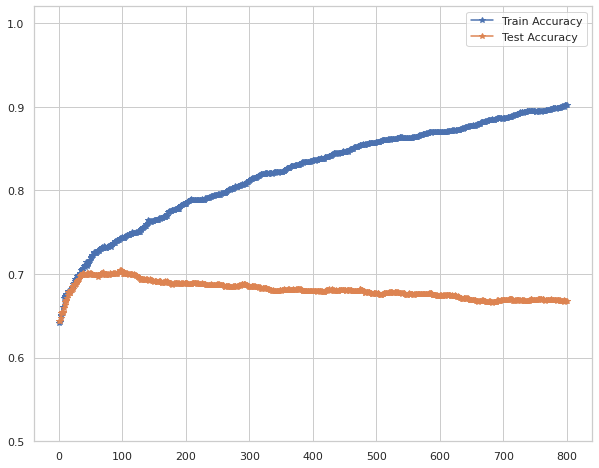

In [84]:
acc_train = list(adaboost.staged_score(X_train,y_train))
acc_test = list(adaboost.staged_score(X_test,y_test))
plt.figure(figsize=(10, 8))
plt.plot(range(1,801),acc_train,'*-',label="Train Accuracy")
plt.plot(range(1,801),acc_test,'*-',label="Test Accuracy")
plt.ylim(0.5,1.02)
plt.legend();

**3.3** Repeat the plot above for a base learner with depth of (1, 2, 3, 4). What trends do you see in the training and test accuracy?

(It's okay if your code re-fits the depth-3 classifier instead of reusing the results from the previous problem.)



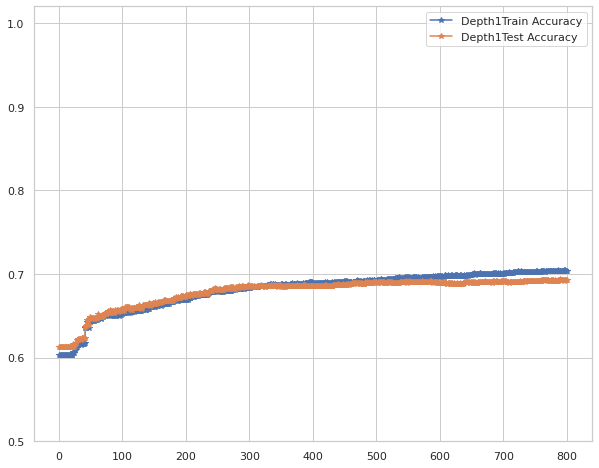

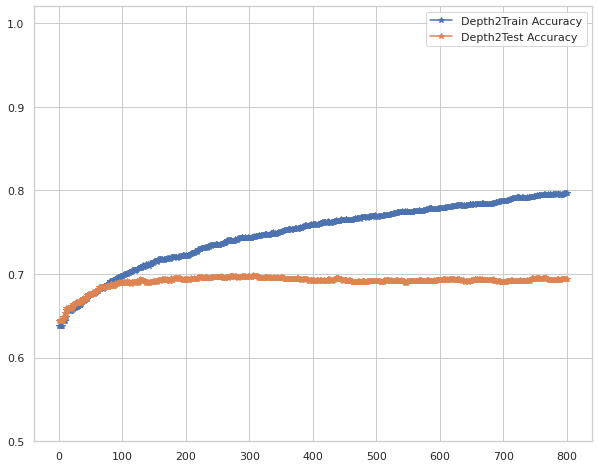

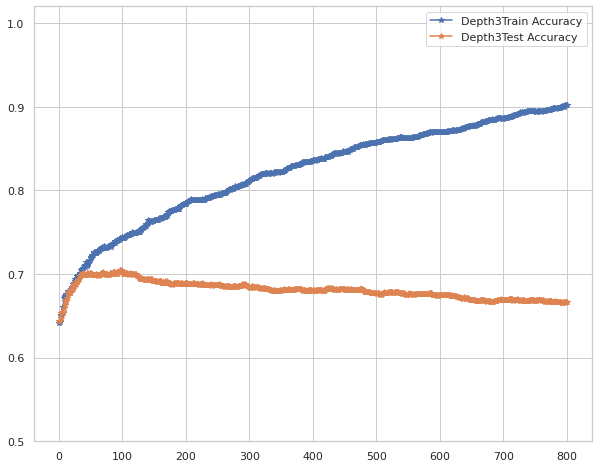

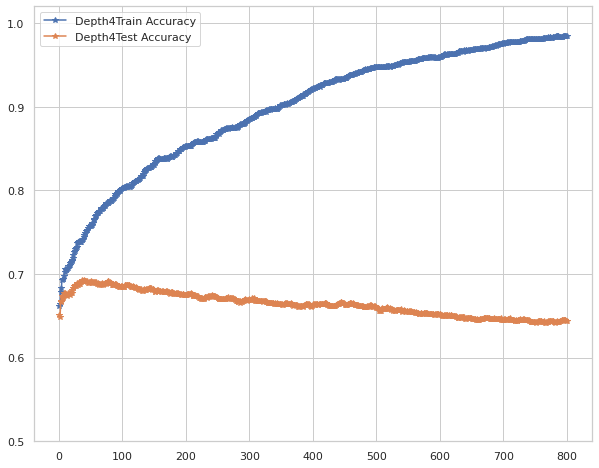

In [85]:
######
# your code here
dep_3 = [1, 2, 3, 4]

for d in dep_3:
  plt.figure(figsize=(10, 8))
  adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=800, learning_rate=0.05)
  adaboost.fit(X_train, y_train)
  acc_train = list(adaboost.staged_score(X_train,y_train))
  acc_test = list(adaboost.staged_score(X_test,y_test))
  plt.plot(range(1,801),acc_train,'*-',label= "Depth"+ str(d) + "Train Accuracy")
  plt.plot(range(1,801),acc_test,'*-',label= "Depth" + str(d) + "Test Accuracy")
  plt.ylim(0.5,1.02)
  plt.legend();



######

*From our plots, we can see that max-depth of tree plays a significant role in determining the bias/variance tradeoff for our model. At depth 1, our model underfits the training data, and shows no variance as it may be only using one predictor to do the splits whereas at depth 4 our model overfits to the data; clearly, increasing depth of trees, widens the bias/variance trade-off for our models. We also notice that with a smaller max-depth, we have more freedom to add more trees to the model without overfitting *


**3.4** Based on the plot you just made, what combination of base learner depth and number of iterations seems optimal? Why? How does the performance of this model compare with the performance of the ensembles you considered above?



In [86]:
######
# your code here
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=97, learning_rate=0.05)
adaboost.fit(X_train, y_train)
best_acc_train = list(adaboost.staged_score(X_train,y_train))
best_acc_test = list(adaboost.staged_score(X_test,y_test))
print("For depth: 3 the original boosted tree had a max accuracy on the training set of", np.max(best_acc_train), "on the test set of", np.max(best_acc_test), 
      ",which occurred when boosting",np.argmax(best_acc_test),"trees")
######

For depth: 3 the original boosted tree had a max accuracy on the training set of 0.7428 on the test set of 0.7042 ,which occurred when boosting 96 trees


In [87]:
######
acc_test_total = pd.DataFrame(np.arange(1,801,1), columns = ['n_est'])
for d in dep_3:
    plt.figure(figsize=(10, 8))
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=800, learning_rate=0.05)
    adaboost.fit(X_train, y_train)
    acc_train = list(adaboost.staged_score(X_train,y_train))
    acc_test = pd.DataFrame(list(adaboost.staged_score(X_test,y_test)), columns = ['test_' + str(d)])
    acc_test_total = pd.concat([acc_test_total, acc_test], axis = 1)
######

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [88]:
acc_test_total.loc[:, acc_test_total.columns != 'n_est'].max()

test_1    0.6936
test_2    0.6986
test_3    0.7040
test_4    0.6942
dtype: float64

In [89]:
acc_test_total.loc[:, acc_test_total.columns == 'test_3'].idxmax()

test_3    97
dtype: int64

*97 iterations at a depth of 3 seems to produce the greatest accuracy. Therefore, we max-depth of 3 and boost over 100 trees for the the optimal test and training accuracy*


**3.5** What is the impact of having too many trees in boosting and in bagging? In which instance is it worse to have too many trees?

*In bagging, datasets with few strong predictors require less trees than dataset with many weak predictors. Having too many trees may cause overfitting in boosting but that is not true for bagging in our case as we do have a lot of weak predictors. As we saw in our plots for 3.2 and 3.3, the boosted models tend to overfit to the training set as more base trees are added while the testing accuracy drops, widening the gap between training and testing accuracy. However, Having too many trees in bagging may also not be desirable as running multiple models with too many trees may be computationally costly and time consuming.*

**3.6** Which technique, boosting or bagging, is better suited to parallelization, where you could have multiple computers working on a problem at the same time?

*Bagging is more suited to parallelization as we build N trees in parallel with N randomly generated datasets with replacement. For multiple computers working on a problem at the same time, the average of the results for each bagging computation could be taken at the end.On the other hand, boosting is more suited to sequential computation, minimizing bias moving forward, as it aims to convert each weak learner into a strong learner by sequentially improving upon the previous classification*
Ref: https://blog.quantinsti.com/ensemble-methods-bagging-boosting/

---

<div class='exercise'> <b> Question 4 [15 pts]: Neural Netwoks </b> </div>




**4.1** Overfit an artificial neural network (ANN): Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to an object called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: 50 
7. Batch size: 128
8. Validation size: .2

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 


**4.2** Create an ANN that minimally overfits (please limit your epochs to no more than 2000, and please use `verbose=0` before submitting).  Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy).  Explain how you can tell the model is only minimally overfitting. 


**4.3** Explain your approach to building a minimally overfit ANN.  What characteristics did you change from `model_overfit` and why did you change them?  


**4.4** How many total parameters did this minimally overfit model use?  Explain why this number makes sense based on the dimensions of the input dataset.

## Answers:

**4.1** Overfit an artificial neural network (ANN): Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to an object called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: 50 
7. Batch size: 128
8. Validation size: .2

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

In [90]:
######
# your code here
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense

model_overfit = Sequential([
    Dense(100, input_shape=(28, ), activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
######



In [91]:
model_overfit.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_overfit.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               2900      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model_overfit.fit(X_train, y_train, epochs=50, batch_size=128, validation_split = .2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 52us/step - loss: 0.6915 - accuracy: 0.5340 - val_loss: 0.6821 - val_accuracy: 0.5460
Epoch 2/50
4000/4000 [==============================] - 0s 17us/step - loss: 0.6728 - accuracy: 0.5832 - val_loss: 0.6713 - val_accuracy: 0.5860
Epoch 3/50
4000/4000 [==============================] - 0s 17us/step - loss: 0.6567 - accuracy: 0.6060 - val_loss: 0.6737 - val_accuracy: 0.5750
Epoch 4/50
4000/4000 [==============================] - 0s 18us/step - loss: 0.6501 - accuracy: 0.6062 - val_loss: 0.6662 - val_accuracy: 0.5910
Epoch 5/50
4000/4000 [==============================] - 0s 17us/step - loss: 0.6334 - accuracy: 0.6352 - val_loss: 0.6644 - val_accuracy: 0.6030
Epoch 6/50
4000/4000 [==============================] - 0s 17us/step - loss: 0.6206 - accuracy: 0.6485 - val_loss: 0.6546 - val_accuracy: 0.6070
Epoch 7/50
4000/4000 [==============================] - 0s 16us/step - loss: 0.613

In [93]:
# evaluate the model
_, train_acc = model_overfit.evaluate(X_train, y_train)
_, test_acc = model_overfit.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

5000/5000 [==============================] - 0s 22us/step
Train: 0.913, Test: 0.579


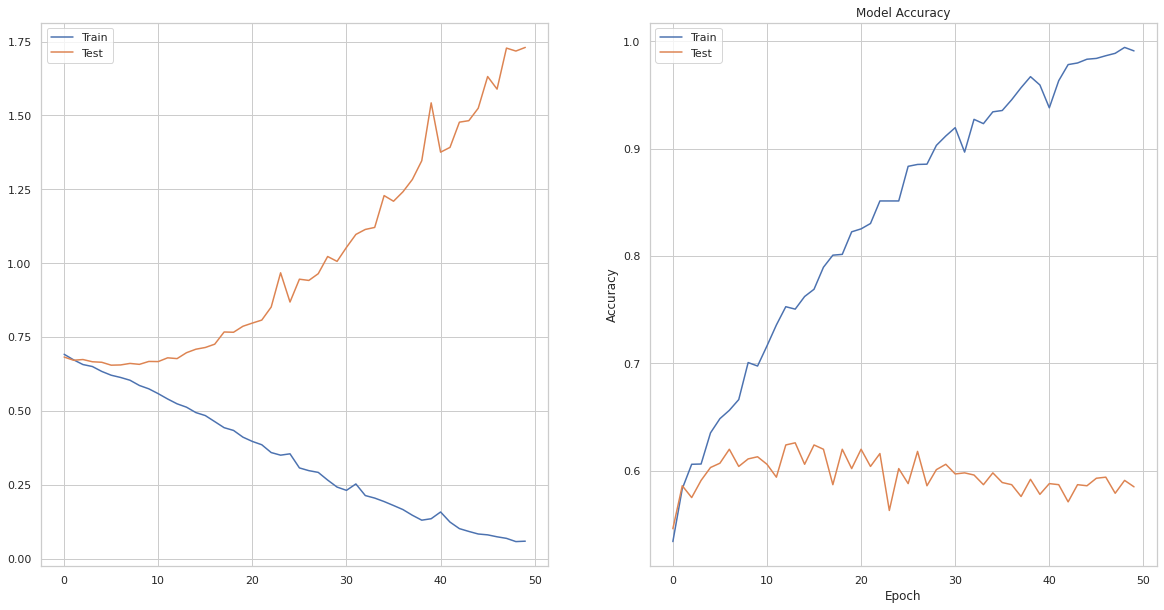

In [94]:
fig, ax = plt.subplots(1, 2,figsize=(20,10))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
ax[1].legend()

# fig.show()

We can see that our model overfits since the training loss keeps decreasing as the model becomes better at classifying the training data. However, we see that it generalizes poorly as depicted by the validation loss, which starts increasing after an initial reduction. We can also see the overfitting by plotting the accuracy of our model on the data and observing that the training accuracy reaches 1 as we increase the epoch count. 

**4.2** Create an ANN that minimally overfits (please limit your epochs to no more than 2000, and please use `verbose=0` before submitting).  Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy).  Explain how you can tell the model is only minimally overfitting. 


In [112]:
######
# your code here
model_underfit = Sequential([
    Dense(28, input_shape=(28, ), activation='relu'),
    Dense(1, activation='sigmoid')
])
model_underfit.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_42 = model_underfit.fit(X_train, y_train, epochs=700, batch_size=128, validation_split = .2)

######


Train on 4000 samples, validate on 1000 samples
Epoch 1/700
4000/4000 [==============================] - 0s 34us/step - loss: 0.7347 - accuracy: 0.5077 - val_loss: 0.7225 - val_accuracy: 0.5080
Epoch 2/700
4000/4000 [==============================] - 0s 11us/step - loss: 0.7079 - accuracy: 0.5115 - val_loss: 0.7047 - val_accuracy: 0.5020
Epoch 3/700
4000/4000 [==============================] - 0s 11us/step - loss: 0.6955 - accuracy: 0.5435 - val_loss: 0.6975 - val_accuracy: 0.5110
Epoch 4/700
4000/4000 [==============================] - 0s 10us/step - loss: 0.6887 - accuracy: 0.5470 - val_loss: 0.6919 - val_accuracy: 0.5330
Epoch 5/700
4000/4000 [==============================] - 0s 10us/step - loss: 0.6843 - accuracy: 0.5552 - val_loss: 0.6888 - val_accuracy: 0.5410
Epoch 6/700
4000/4000 [==============================] - 0s 11us/step - loss: 0.6801 - accuracy: 0.5673 - val_loss: 0.6861 - val_accuracy: 0.5390
Epoch 7/700
4000/4000 [==============================] - 0s 11us/step - loss

In [107]:
# acc_test_42 = history_42.history
acc_train_42 = np.max(history_42.history['accuracy'])
acc_test_42 = np.max(history_42.history['val_accuracy'])

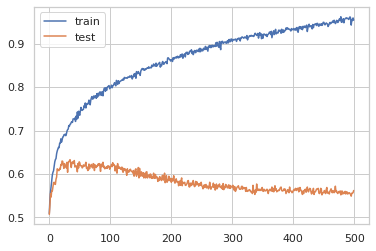

In [110]:
pyplot.plot(history_42.history['accuracy'], label='train')
pyplot.plot(history_42.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

From our plots, we can see that our model is minimally overfitting by observing that the validation loss levels off before approaching 0. Our model 

**4.3** Explain your approach to building a minimally overfit ANN.  What characteristics did you change from `model_overfit` and why did you change them?  

*We build an ANN with much smaller capacity than the overfit model in 4.2 by reducing the number of nodes and layers in our model. We choose 28 nodes as providing any more only generates unncessary space since 28 different transformations would allow each predictor to be combined and transformed as needed for fitting the training data.*

**4.4** How many total parameters did this minimally overfit model use?  Explain why this number makes sense based on the dimensions of the input dataset.

In [113]:
# X_train.shape
model_underfit.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 29        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


*Our model has 841 total parameters. The first layer has 812 paramters, allowing for the 28 to the power of 28 different transformations being generated along with one extra for each of the 28 nodes. The output layer also 28 parameters for each of transformed data coming out of layer 1. The number of parameters is expected because of the combination of transformations that we want on our predictor set of 28 variables.*

---

<div class='exercise'> <b> Question 5 [15 pts]: Model Comparison </b> </div>


**5.1**: Make a pandas table of the training and test accuracy for the following 6 models and name it `results_df`:

- The tuned L2-regularized logistic regression (from Question 1)
- Single tree with best depth chosen by cross-validation (from Question 2)
- Your tuned bagging model (from Question 2)
- Your tuned random forest model  (from Question 2)
- Your tuned adaBoost model  (from Question 3)
- Your minimally overfit ANN model (from Question 4)

(see below for the expected structure)  

(This problem should not require fitting any new models, though you may need to go back and store the accuracies from models you fit previously.)

What is the relative performance of each model on the training set? On the test set? Comment on how these relationships make sense (or don't make sense) in light of how each model treats the bias-variance trade-off.


**5.2** Reflect on the overall performance of all of the different classifiers you have seen throughout this assignment. Which performed best? Why do you think that may have happened?


**5.3** Which of these techniques can be extended to regression tasks? How?

## Answers

**5.1**: Make a pandas table of the training and test accuracy for the following 6 models and name it `results_df`:

- The tuned L2-regularized logistic regression (from Question 1)
- Single tree with best depth chosen by cross-validation (from Question 2)
- Your tuned bagging model (from Question 2)
- Your tuned random forest model  (from Question 2)
- Your tuned adaBoost model  (from Question 3)
- Your minimally overfit ANN model (from Question 4)

(see below for the expected structure)  

(This problem should not require fitting any new models, though you may need to go back and store the accuracies from models you fit previously.)

What is the relative performance of each model on the training set? On the test set? Comment on how these relationships make sense (or don't make sense) in light of how each model treats the bias-variance trade-off.

---

Fill in the following table.


| classifier | training accuracy | test accuracy |
| --- | --- | --- |
| logistic regression  | | |
| single tree  | | |
| bagging | | |
| random forest  | | |
| adaboost  | | |
| neural network  | | |

In [100]:
######
column_names = ['classifier', 'train', 'test']
classifier = pd.DataFrame(['logistic regression', 'single tree', 'bagging',
                           'random forest', 'adaboost','neural network'], columns = ['classifier'])
train =  pd.DataFrame([accuracy_score(y_train, yhat_train1_4), accuracy_score(y_train, yhat_train2_2), bagging_train_score,
                       random_forest_train_score, train_score, train_acc], columns = ['training accuracy'])
test =  pd.DataFrame([accuracy_score(y_train, yhat_train1_4), accuracy_score(y_train, yhat_test2_2), bagging_test_score,
                     random_forest_test_score, test_score, test_acc], columns = ['test accuracy'])
results_df = pd.concat([classifier, train, test], axis = 1).set_index('classifier')
results_df
######

,training accuracy,test accuracy
classifier,,
logistic regression,0.6310,0.6310
single tree,0.6812,0.5116
bagging,0.6650,0.6382
random forest,0.7266,0.6898
adaboost,1.0000,0.6034
neural network,0.9126,0.5786


*From our table we can see that except for the adaboost and neural network, we obtained relatively low training accuracy in all our models. We can see that logistic regression unlike the tree-based methods, doesn't overfit to our training data. While logistic regression out-performs single tree in predicting over the testing data, by introducing more randomness in our model through bagging and random forest bootstraping, we are able to achieve higher training and testing accuracies from both the single tree and logistic regression model. This is to be expected as random forest and bagging reduce the variance observed in other models including adaboost and neural network which are models with low bias (as seen by the high training accuracy) but high variance, therefore an inability to generalize on new data, hence giving lower accuracy on the test data.*



**5.2** Reflect on the overall performance of all of the different classifiers you have seen throughout this assignment. Which performed best? Why do you think that may have happened?



*The random forest model outperforms our other models. One of the advantages of random forest over other models is that it does not overfit to the training data even if there more trees. Moreover, it splits the features in a way that ensures that the model doesn't rely on any individual feature because of some sampling. Also as we noted earlier, random forest optimizes the bias-varaince cutoff by reducing on the variance that we observe in our other models as causing wide disparities between the training and testing accuracy especially in adaboost and the neural network model.*


**5.3** Which of these techniques can be extended to regression tasks? How?


*Logistic Regression, Random Forest and Adaboost can all be used for regression tasks as well. In logistic regression, data is fit into a logistic regression model which is then acted upon by a logistic function predicting the target categorical response variable. For both Random forest and Adaboost, sklearn provides separate methods for using on regression tasks. Adaboost acheive regression task by  boosting on the sample data similar to in classification since boosting is a type of linear regression.*